# import library

In [59]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor as regressor
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# get data

In [2]:
df = pd.read_csv('data_ticker.csv')
df.set_index(['date'], inplace = True)
df.fillna(0,inplace =  True)
df

,Unnamed: 0,ticker,open,close,mark,log return,volatility
date,,,,,,,
1990-12-20,0,000001.SS,104.39,104.39,1,0.000000,0.000000
1990-12-21,1,000001.SS,109.13,109.13,0,0.044406,0.000000
1990-12-24,2,000001.SS,114.55,114.55,0,0.048472,0.000000
1990-12-25,3,000001.SS,120.25,120.25,0,0.048562,0.000000
1990-12-26,4,000001.SS,125.27,125.27,0,0.040898,0.000000
...,...,...,...,...,...,...,...
2019-01-28,3757643,^XAYDUNG,961.96,967.05,0,0.004820,0.196856
2019-01-29,3757644,^XAYDUNG,961.86,955.41,0,-0.012110,0.198633
2019-01-30,3757645,^XAYDUNG,950.53,940.12,0,-0.016133,0.198573


In [3]:
df.columns

Index(['Unnamed: 0', 'ticker', 'open', 'close', 'mark', 'log return',
       'volatility'],
      dtype='object')

In [6]:
df = df [['ticker', 'open', 'close',  'log return', 'volatility']]


# Thử dự đoán volatility dựa trên 1 số mã cổ phiếu liên quan

Tiền xử lý dữ liệu trước khi train

In [65]:
FPT_df = df[df['ticker'] == 'FPT']
FPT_df = FPT_df.iloc[::-1]
ACB_df = df[df['ticker'] == 'ACB']
ACB_df = ACB_df.iloc[::-1]
SHB_df = BID_df = df[df['ticker'] == 'SHB']
SHB_df = SHB_df.iloc[::-1]

In [66]:
final_df = pd.DataFrame({'ACB':ACB_df['volatility'], 'SHB':SHB_df['volatility'], 'FPT':FPT_df['volatility'] }, index = ACB_df.index)
final_df.fillna(0, inplace = True)

In [67]:
final_df['predict'] = final_df['FPT'].shift(-5)
final_df

,ACB,SHB,FPT,predict
date,,,,
2021-10-01,0.242589,0.252441,0.150254,0.169315
2021-09-30,0.242605,0.248399,0.150414,0.175876
2021-09-29,0.240642,0.237796,0.152210,0.176330
2021-09-28,0.243827,0.238793,0.153318,0.178759
2021-09-27,0.243448,0.236787,0.155258,0.176786
...,...,...,...,...
2006-11-27,2.187261,0.000000,0.000000,NaN
2006-11-24,2.187261,0.000000,0.000000,NaN
2006-11-23,2.186966,0.000000,0.000000,NaN


In [68]:
final_df = final_df.iloc[::-1]
final_df = final_df[500:]

In [69]:
final_df.head(20)

,ACB,SHB,FPT,predict
date,,,,
2008-11-27,0.624703,0.815270,0.662632,0.667496
2008-11-28,0.654795,0.793602,0.669000,0.662389
2008-12-01,0.657146,0.788641,0.663943,0.651516
2008-12-02,0.640384,0.782477,0.666813,0.643144
2008-12-03,0.630116,0.782477,0.665085,0.646864
2008-12-04,0.610502,0.782477,0.649927,0.662632
2008-12-05,0.617620,0.833290,0.640170,0.669000
2008-12-08,0.607638,0.833290,0.644317,0.663943
2008-12-09,0.608722,0.833290,0.652054,0.666813


In [70]:
train_df, test_df = tts(final_df, train_size = 0.8, shuffle = False)
X_train = train_df.drop(columns = ['predict'])
y_train = train_df['predict']
X_train,X_val,y_train,y_val = tts(X_train,y_train, train_size = 0.8, shuffle = False)
test_df.drop(['2021-10-01'], inplace = True)
X_test= test_df.drop(columns = ['predict'])
y_test = test_df['predict']

train mô hình dựa trên xgbregressor

In [71]:
model = regressor(n_estimators = 120, learning_rate = 0.08)
model.fit(X_train,y_train, eval_set = [(X_val, y_val)], verbose = True, eval_metric = 'auc')

[0]	validation_0-auc:0.61513
[1]	validation_0-auc:0.61605
[2]	validation_0-auc:0.61656
[3]	validation_0-auc:0.61661
[4]	validation_0-auc:0.61676
[5]	validation_0-auc:0.61664
[6]	validation_0-auc:0.61664
[7]	validation_0-auc:0.61752
[8]	validation_0-auc:0.61718
[9]	validation_0-auc:0.61702
[10]	validation_0-auc:0.61730
[11]	validation_0-auc:0.61735
[12]	validation_0-auc:0.61737
[13]	validation_0-auc:0.61711
[14]	validation_0-auc:0.61716
[15]	validation_0-auc:0.61729
[16]	validation_0-auc:0.61731
[17]	validation_0-auc:0.61676
[18]	validation_0-auc:0.61654
[19]	validation_0-auc:0.61658
[20]	validation_0-auc:0.61650
[21]	validation_0-auc:0.61638
[22]	validation_0-auc:0.61643
[23]	validation_0-auc:0.61636
[24]	validation_0-auc:0.61624
[25]	validation_0-auc:0.61621
[26]	validation_0-auc:0.61611
[27]	validation_0-auc:0.61597
[28]	validation_0-auc:0.61591
[29]	validation_0-auc:0.61577
[30]	validation_0-auc:0.61574
[31]	validation_0-auc:0.61573
[32]	validation_0-auc:0.61557
[33]	validation_0-au

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=120, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
model.score(X_test, y_test)

0.7850554706427697

<AxesSubplot:xlabel='date'>

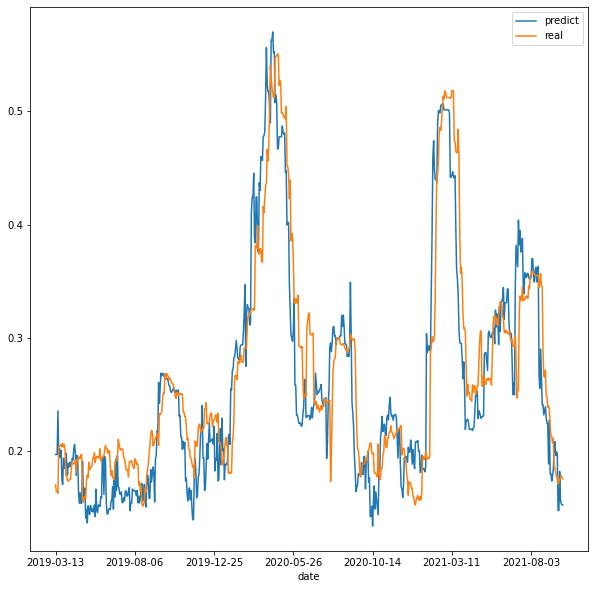

In [72]:
predict = model.predict(X_test)
predict_df = pd.DataFrame({'predict': predict,'real':y_test},index = y_test.index)
predict_df.plot(figsize = (10,10))

# Thử dự đoán volatility qua dữ liệu lịch sử

Lấy dữ liệu

In [47]:
def get_data(str):
    temp_df = df[df['ticker'] == str]
    final_df = pd.DataFrame({'today':temp_df['volatility'],'today_price' : temp_df.close, 'lastday':temp_df['volatility'].shift(-1), 'lastlastday':temp_df['volatility'].shift(-2), 'nextday':temp_df['volatility'].shift(5)}, index = temp_df.index)
    final_df.dropna(inplace = True)
    train_df, test_df = tts(final_df, train_size = 0.8, shuffle = False)
    X_train = train_df.drop(columns = ['nextday'])
    y_train = train_df['nextday']
    X_test= test_df.drop(columns = ['nextday'])
    y_test = test_df['nextday']
    price = test_df.today_price
    X_train.drop(columns = {'today_price'}, inplace = True)
    X_test.drop(columns = {'today_price'}, inplace = True)
    return X_train, y_train, X_test, y_test, price

Các hàm dự đoán

In [54]:
def linear_df(str):
    X_train, y_train, X_test, y_test, price = get_data(str)
    model = LinearRegression()
    model.fit(X_train,y_train)
    print(model.score(X_test, y_test))
    predict = model.predict(X_test)
    predict_df = pd.DataFrame({'today': X_test.today,'predict': predict,'real':y_test, 'today price': price}, index = None)
    return predict_df
def xgb_df(str):
    X_train, y_train, X_test, y_test, price = get_data(str)
    X_train, X_val, y_train, y_val = tts(X_train, y_train, train_size = 0.8, shuffle = False) 
    model = regressor(learning_rate = 0.06, max_depth = 6, min_child_weight = 2, n_estimators = 150)
    model.fit(X_train,y_train, eval_set = [(X_val, y_val)], eval_metric = 'auc', verbose = False)
    print(model.score(X_test, y_test))
    predict = model.predict(X_test)
    predict_df = pd.DataFrame({'today':X_test.today, 'predict': predict,'real':y_test, 'today price' : price},index = y_test.index)
    return predict_df

In [64]:
linear_df('FPT')

0.8550783733895235


,today,predict,real,today price
date,,,,
2018-10-18,0.252669,0.259158,0.248128,27.1216
2018-10-19,0.252466,0.258844,0.259815,26.7484
2018-10-22,0.250651,0.256966,0.265036,26.8417
2018-10-23,0.255620,0.261987,0.265709,26.2508
2018-10-24,0.256857,0.263544,0.261435,26.0019
...,...,...,...,...
2021-09-23,0.175876,0.182481,0.172316,93.1000
2021-09-24,0.169315,0.175793,0.174857,92.7000
2021-09-27,0.155258,0.161427,0.176786,92.1000


In [74]:
xgb_df('FPT')

0.8619370323329899


,today,predict,real,today price
date,,,,
2018-10-18,0.252669,0.246911,0.248128,27.1216
2018-10-19,0.252466,0.246911,0.259815,26.7484
2018-10-22,0.250651,0.246911,0.265036,26.8417
2018-10-23,0.255620,0.256433,0.265709,26.2508
2018-10-24,0.256857,0.256433,0.261435,26.0019
...,...,...,...,...
2021-09-23,0.175876,0.204887,0.172316,93.1000
2021-09-24,0.169315,0.191799,0.174857,92.7000
2021-09-27,0.155258,0.170463,0.176786,92.1000


Giả sử tính toán tiền thu về dựa trên chiến lược đầu từ volatility targeting

In [87]:
def calculate(ticker_arr, target_volatility, str):
    n = len(ticker_arr)
    predict = [[]*252]*n
    price = [[]*252]*n
    if str == 'linear':
        for i in range(n):
            temp = linear_df(ticker_arr[i]).tail(252)
            predict[i] = temp['predict']
            price[i] = temp['today price']
            if i == 0:
                index = temp.index
    else:
        for i in range(n):
            temp = xgb_df(ticker_arr[i]).tail(252)
            predict[i] = temp['predict']
            price[i] = temp['today price']
            if i == 0:
                index = temp.index
    
    begin_money = 50000000
    money_left = begin_money
    cp = [0]*n
    for i in range(n):
        cp[i] = 100000
        money_left -= cp[i]*price[i][0]
    target = target_volatility/n
    total = [1]
    for i in range(1,252):
        temp_predict = [0]*n
        temp_price = [0]*n
        sum = money_left
        for j in range(n):
            temp_predict[j] = predict[j][i]
            temp_price[j] = price[j][i]
            sum += temp_price[j]*cp[j]

        total.append(sum/begin_money)
        temp_sum = money_left
        temp_cp = [1]*n
        for j in range(n):
            temp_volatility = (cp[j]*temp_price[j]*temp_predict[j])/sum
            temp_cp[j] = round(cp[j]/(temp_volatility/target))
            temp_sum += temp_cp[j]*temp_price[j]
        t = temp_sum/sum
        #print(sum, temp_sum)
        for j in range(n):
            temp_cp[j] =  round(temp_cp[j]/t)-1
            money_left = money_left - (temp_cp[j]-cp[j])*temp_price[j]
            cp[j] = temp_cp[j]

    df = pd.DataFrame({'total': total} )
    df.set_index(index, inplace = True)
    df.plot(figsize = (15, 10))
    print('score:' ,  total[-1])


0.8550783733895235
0.9200069643991986
0.8971785513271004
0.9092674384247466
score: 1.7685891758040002


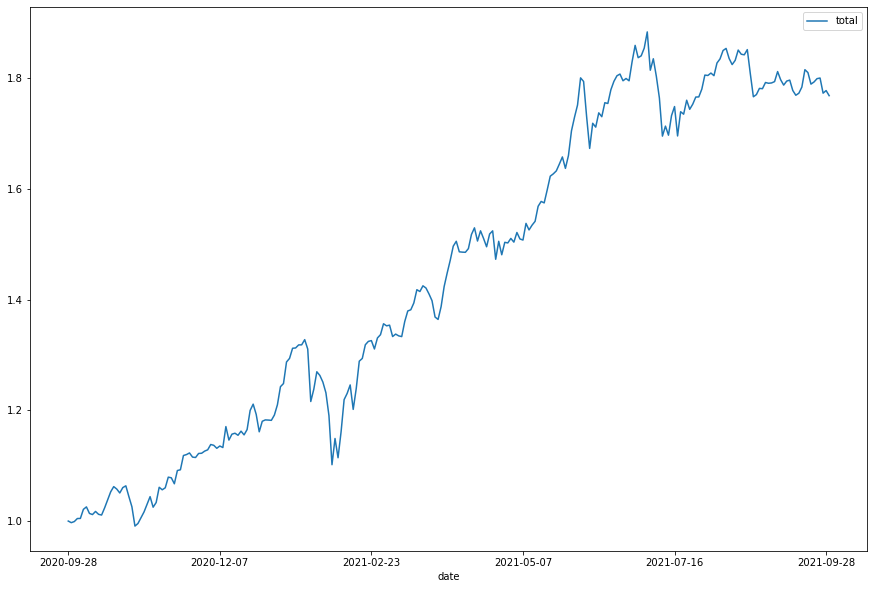

In [90]:
calculate(['FPT', 'SHB', 'ACB', 'AAA'], 0.3, 'linear')        

0.8619370323329899
0.8389978890070671
0.728485823190598
0.900830050068334
score: 1.8162734662219993


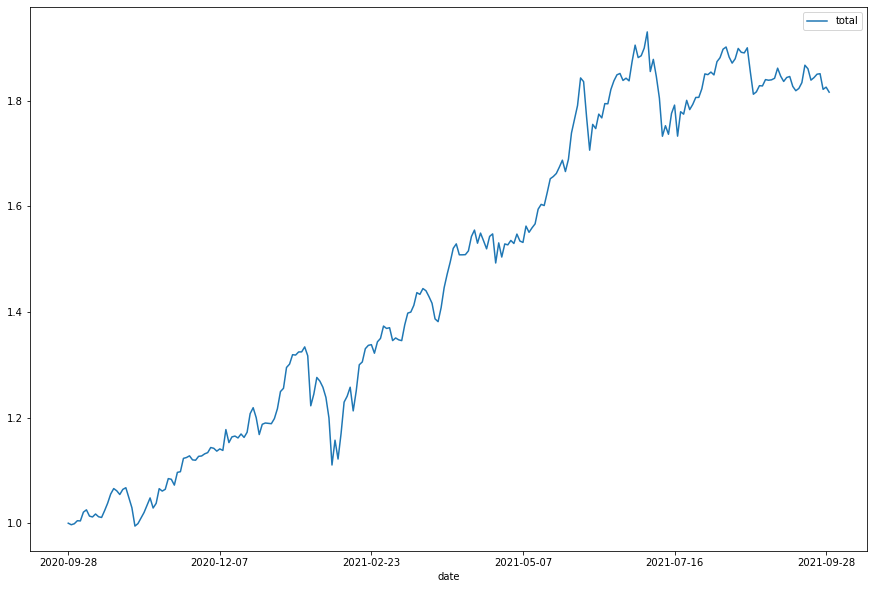

In [89]:
calculate(['FPT', 'SHB', 'ACB', 'AAA'], 0.3, 'xgb')        